# TP2 Prétraitement et visualisation de données

<p> 
</p>

## Normalisation de données
***


<p>
L’
Analyse
en
Composantes
Principales
(ACP)
a
comme
objectif
d’identifier
la
combinaison
d'attributs
(composants
principaux,
ou
les
directions
dans
l'espace
de
caractéristique),
qui
représentent
le
plus
la
variance
dans
les
données.
L’Analyse
discriminante
linéaire
(ADL)
tente
d'identifier
les
attributs
qui
représentent
le
plus
la
variance
entre
les
classes.
En
particulier,
l’ADL,
contrairement
à
l'APC,
est
un
procédé
supervisé
en
utilisant
les
étiquettes
de
classe
connus.
</p>

In [1]:
import numpy as np
X = np.array([[1, -1, 2], [2, 0, 0], [0, 1, -1]])

### Visualisez X et calculez la moyenne et la variance de X.

In [2]:

print('> X :\n',X)
print('> Mean : ',np.mean(X))
print('> Std : ', np.std(X))

> X :
 [[ 1 -1  2]
 [ 2  0  0]
 [ 0  1 -1]]
> Mean :  0.4444444444444444
> Std :  1.0657403385139377


### Utilisez la fonction scale pour normaliser la matrice X. Que constatez vous ?

In [4]:
from sklearn import preprocessing

X_norm = preprocessing.scale(X)
print(X_norm)

[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


#### Que constatez vous ?
**Réponse :**<br/>
la variance permet de combiner toutes les valeurs à l'intérieur d'un ensemble de données afin d'obtenir la mesure de dispersion. dans la matrice X les données sont plus disperssés pa rapport à la matrice X aprés la normalisation.


### Calculer la moyenne et la variance de la matrice X normalisé. Expliquez le résultat obtenu.

In [5]:
print('> Mean : ',np.mean(X_norm))
print('> Std : ', np.std(X_norm))

> Mean :  4.9343245538895844e-17
> Std :  1.0


## Normalisation MinMax
***

### Créez la matrice de données X2 suivante :<br/>
1, -1, 2,<br/>
2, 0, 0,<br/>
0, 1, -1<br/>

In [27]:
X2 = X


In [28]:
print('> X :\n',X2)
print('> Mean : ', [np.mean(x) for x in X2])
print('> Std : ', [np.std(x) for x in X2])

> X :
 [[ 1 -1  2]
 [ 2  0  0]
 [ 0  1 -1]]
> Mean :  [0.6666666666666666, 0.6666666666666666, 0.0]
> Std :  [1.247219128924647, 0.9428090415820634, 0.816496580927726]


### Normalisez les données dans l’intervalle ['0 1].

In [29]:
scaleX2 = preprocessing.MinMaxScaler((0, 1))
X2_norm = scaleX2.fit_transform(X2)

### Visualisez les données normalisées et calculez la moyenne sur les variables.

In [30]:
print('> X2_norm :\n', X2_norm)
print('> Mean : ', [np.mean(x) for x in X2_norm])
print('> Std : ', [np.std(x) for x in X2_norm])


> X2_norm :
 [[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]]
> Mean :  [0.5, 0.611111111111111, 0.3333333333333333]
> Std :  [0.408248290463863, 0.28327886186626583, 0.4714045207910317]


#### Que constatez‐vous?

MinMaxScaler: Les valeurs de la matrice après la normalisation se trouvent entre la valeur moyenne minimum et la valeur moyenne maximum des variables en ne dépassant pas l'intervalle [0,1]

## Visualisation de données
***

### Chargez les données Iris

In [31]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
targets = iris.target

### Visualisez le nuage de points en 2D avec des couleurs correspondant aux classes en utilisant toutes les combinaisons de variables.

In [32]:
data.shape

(150, 4)

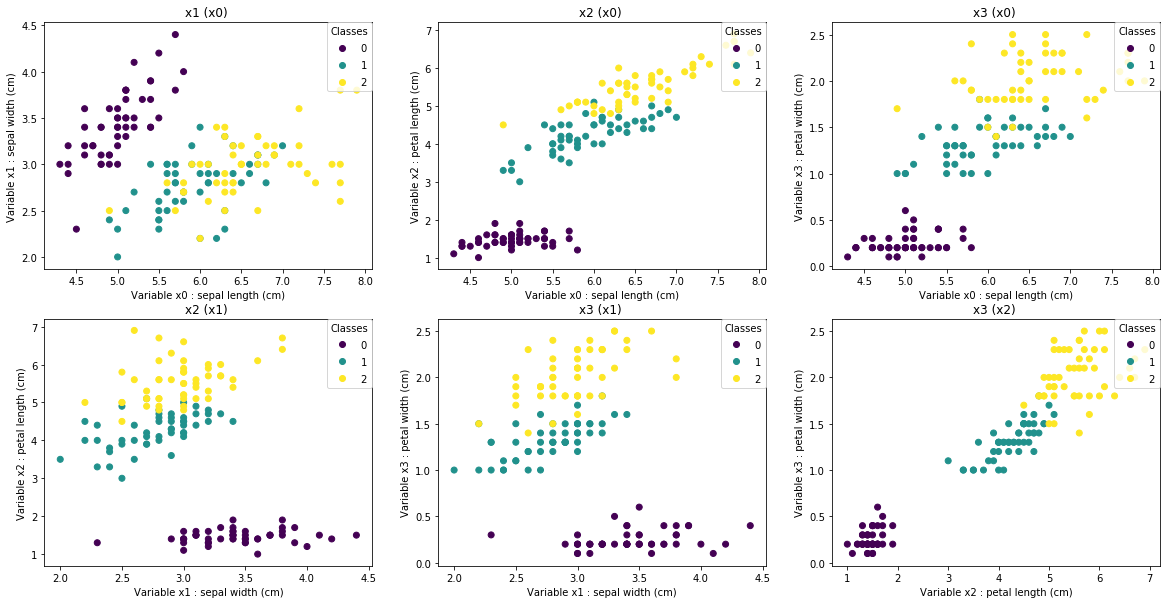

In [33]:
import matplotlib.pyplot as plt

plt.subplots(2,3,figsize=(20,10))
cpp = 1
for i in range(4):
    for j in range(i+1, 4):
        plt.subplot(2,3,cpp)
        cpp+=1
        scatter = plt.scatter(data[:,i], data[:,j], c=targets)
        plt.title('x'+str(j)+' (x'+str(i)+') ')
        plt.xlabel('Variable x'+str(i)+' : '+iris.feature_names[i])
        plt.ylabel('Variable x'+str(j)+' : '+iris.feature_names[j])
        plt.legend(*scatter.legend_elements(), loc="upper right", title="Classes", borderaxespad=0.)
plt.show()


#### Quelle est la meilleure visualisation ? Justifiez votre réponse.

La meilleure visualisation est : le plot x3 en fonction de x2,
car les classes son bien sepparie

## Réduction de dimensions et visualisation de données
***

<p>
L’Analyse en Composantes Principales (ACP) a comme objectif d’identifier la combinaison d'attributs (composants principaux, ou les directions dans l'espace de caractéristique), qui représentent le plus la variance dans les données. 
<br/>
L’Analyse discriminante linéaire (ADL) tente d'identifier les attributs qui représentent le plus la variance entre les classes.
En particulier, l’ADL, contrairement à l'APC, est un procédé supervisé en utilisant les étiquettes de classe connus.
</p>

### Les méthodes PCA et LDA peuvent etre importé à partir des package suivants :

In [34]:
from sklearn.decomposition import PCA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

### Analysez le manuel d’aide pour ces deux fonctions (pca et lda) et appliquez les sur la base Iris. Il faudra utiliser pca.fit(Iris).transform(Iris) et sauvegardez les résultats dans IrisPCA pour la PCA et IrisLDA pour la LDA.

In [35]:
help(PCA)

Help on class PCA in module sklearn.decomposition.pca:

class PCA(sklearn.decomposition.base._BasePCA)
 |  PCA(n_components=None, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
 |  
 |  Principal component analysis (PCA)
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 |  Param

In [36]:
pca = PCA(n_components=2)
IrisPCA=pca.fit_transform(iris.data)
print(IrisPCA[:5])

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]


In [37]:
help(LDA)

Help on class LinearDiscriminantAnalysis in module sklearn.discriminant_analysis:

class LinearDiscriminantAnalysis(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.base.TransformerMixin)
 |  LinearDiscriminantAnalysis(solver='svd', shrinkage=None, priors=None, n_components=None, store_covariance=False, tol=0.0001)
 |  
 |  Linear Discriminant Analysis
 |  
 |  A classifier with a linear decision boundary, generated by fitting class
 |  conditional densities to the data and using Bayes' rule.
 |  
 |  The model fits a Gaussian density to each class, assuming that all classes
 |  share the same covariance matrix.
 |  
 |  The fitted model can also be used to reduce the dimensionality of the input
 |  by projecting it to the most discriminative directions.
 |  
 |  .. versionadded:: 0.17
 |     *LinearDiscriminantAnalysis*.
 |  
 |  Read more in the :ref:`User Guide <lda_qda>`.
 |  
 |  Parameters
 |  ----------
 |  solver : string, optional
 |      So

In [38]:
clf = LDA(n_components=2)
IrisLDA=clf.fit(iris.data,iris.target).transform(iris.data)
print(IrisLDA[:5])

[[ 8.06179978  0.30042062]
 [ 7.12868772 -0.78666043]
 [ 7.48982797 -0.26538449]
 [ 6.81320057 -0.67063107]
 [ 8.13230933  0.51446253]]


### Visualisez les nuages de points avec les nouvelles axes obtenus : une image pour l’ACP et une autre pour l’ADL et utiliser la classe de Iris comme couleurs de points. Quelle différence constatez-­‐vous entre les deux visualisations? Expliquer votre raisonnement.

<Figure size 432x288 with 0 Axes>

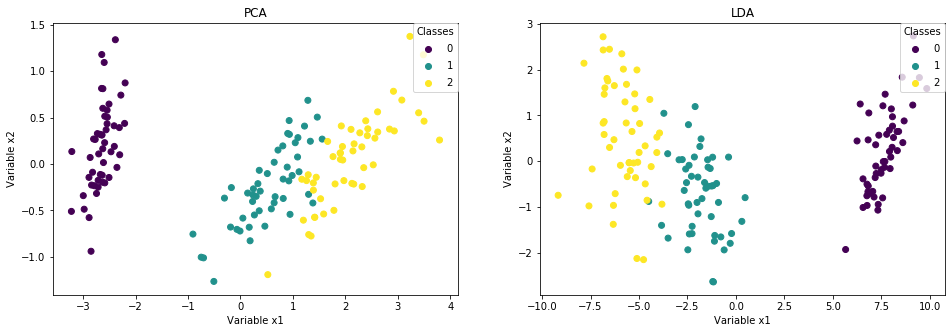

In [41]:
plt.figure()
plt.subplots(2,3,figsize=(16,5))
plt.subplot(1,2,1)
scatter = plt.scatter(IrisPCA[:,0], IrisPCA[:,1], c=targets)
plt.title('PCA')
plt.xlabel('Variable x1')
plt.ylabel('Variable x2')
plt.legend(*scatter.legend_elements(), loc="upper right", title="Classes", borderaxespad=0.)

plt.subplot(1,2,2)
scatter = plt.scatter(IrisLDA[:,0], IrisLDA[:,1], c=targets)
plt.title('LDA')
plt.xlabel('Variable x1')
plt.ylabel('Variable x2')
plt.legend(*scatter.legend_elements(), loc="upper right", title="Classes", borderaxespad=0.)

plt.show()

### Quelle différence constatez-­‐vous entre les deux visualisations? Expliquer votre raisonnement.


<p>
Le LDA et le PCA sont des techniques de transformation linéaire: le LDA est un supervisé tandis que le PCA non supervisé - le PCA ignore les étiquettes de classe.

Nous pouvons imaginer l'ACP comme une technique qui trouve les directions de la variance maximale.
(L'ACP a tendance à entraîner de meilleurs résultats de classification dans une tâche de reconnaissance d'image si le nombre d'échantillons pour une classe donnée était relativement faible.)

Contrairement à PCA, LDA tente de trouver un sous-espace de fonctionnalités qui maximise la séparabilité des classes.
LDA fait des hypothèses sur les classes normalement distribuées et les covariances de classe égales.
</p>

***
### Links
- [E-mail :](mailto:m.elkhou@hotmail.com) m.elkhou@hotmail.com
- [GitHub :](https://github.com/m-elkhou) github.com/m-elkhou
- [Linkedin :](https://www.linkedin.com/in/m-elkhou/) linkedin.com/in/m-elkhou